In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
import re
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import f1_score, accuracy_score
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.notebook_repr_html', True)

In [3]:
train_url='train.csv'
test_url="test.csv"
train = pd.read_csv(train_url,index_col=0)
test = pd.read_csv(test_url,index_col=0)
# concatenating both datasets
df = pd.concat([train, test])
df.head()


,label,tweet
id,,
1,0.0,@user when a father is dysfunctional and is s...
2,0.0,@user @user thanks for #lyft credit i can't us...
3,0.0,bihday your majesty
4,0.0,#model i love u take with u all the time in ...
5,0.0,factsguide: society now #motivation


In [3]:
train.head()

,label,tweet
id,,
1,0,@user when a father is dysfunctional and is s...
2,0,@user @user thanks for #lyft credit i can't us...
3,0,bihday your majesty
4,0,#model i love u take with u all the time in ...
5,0,factsguide: society now #motivation


In [4]:
test.head()

,tweet
id,
31963,#studiolife #aislife #requires #passion #dedic...
31964,@user #white #supremacists want everyone to s...
31965,safe ways to heal your #acne!! #altwaystohe...
31966,is the hp and the cursed child book up for res...
31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [5]:
print(train.shape, test.shape, df.shape) # shape returns dimensions

(31962, 2) (17197, 1) (49159, 2)


In [6]:
df.describe()


,label
count,31962.000000
mean,0.070146
std,0.255397
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [7]:
df.dtypes


label    float64
tweet     object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49159 entries, 1 to 49159
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   31962 non-null  float64
 1   tweet   49159 non-null  object 
dtypes: float64(1), object(1)
memory usage: 1.1+ MB


In [8]:
df.isnull().sum()

label    17197
tweet        0
dtype: int64

In [9]:
df.isnull()

,label,tweet
id,,
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
...,...,...
49155,True,False
49156,True,False
49157,True,False


In [10]:
# Checking unique labels
df['label'].value_counts()

0.0    29720
1.0     2242
Name: label, dtype: int64

<AxesSubplot: xlabel='label', ylabel='count'>

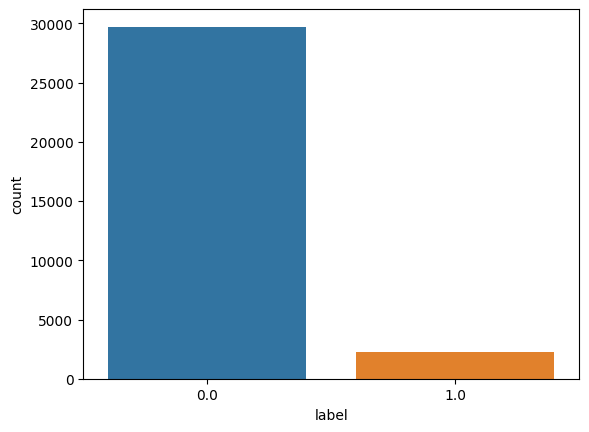

In [11]:
# Ploting unique labels
sns.countplot(x='label', data=df)


In [12]:
 # Cleaning Raw tweets
def clean_text(text):
  #remove emails
  text = ' '.join([i for i in text.split() if '@' not in i])
  #remove web address ? Means matching anything to its left \S all non white␣

  text = re.sub('http[s]?://\S+', '', text)
  #Filter to allow only alphabets
  text = re.sub(r'[^a-zA-Z\']', ' ', text)
  #Remove Unicode characters
  text = re.sub(r'[^\x00-\x7F]+', '', text)
  #Convert to lowercase to maintain consistency
  text = text.lower()
  #remove double spaces
  text = re.sub('\s+', ' ',text)
  return text

df["clean_tweet"] = df.tweet.apply(lambda x: clean_text(x))

In [13]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
print(stopwords.words('english'))


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [14]:
df['cleaned_tweet'] = df['clean_tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords.words('english'))]))


In [15]:
print(df["clean_tweet"])

id
1        when a father is dysfunctional and is so selfi...
2        thanks for lyft credit i can't use cause they ...
3                                      bihday your majesty
4           model i love u take with u all the time in ur 
5                        factsguide society now motivation
                               ...                        
49155    thought factory left right polarisation trump ...
49156    feeling like a mermaid hairflip neverready for...
49157     hillary campaigned today in ohio omg amp used...
49158    happy at work conference right mindset leads t...
49159    my song so glad free download shoegaze newmusi...
Name: clean_tweet, Length: 49159, dtype: object


In [16]:
df['word_count']=df.cleaned_tweet.str.split().apply(lambda x: len(x))


In [17]:
print(df.head())


    label                                              tweet  \
id                                                             
1     0.0   @user when a father is dysfunctional and is s...   
2     0.0  @user @user thanks for #lyft credit i can't us...   
3     0.0                                bihday your majesty   
4     0.0  #model   i love u take with u all the time in ...   
5     0.0             factsguide: society now    #motivation   

                                          clean_tweet  \
id                                                      
1   when a father is dysfunctional and is so selfi...   
2   thanks for lyft credit i can't use cause they ...   
3                                 bihday your majesty   
4      model i love u take with u all the time in ur    
5                   factsguide society now motivation   

                                        cleaned_tweet  word_count  
id                                                                 
1   father dysf

In [18]:
ndf=df.copy()
ndf = ndf.drop(['tweet','clean_tweet','word_count'], axis = 1)
#ndf = ndf.drop(['tweet','clean_tweet','scores','compound','word_count','comp_score'],␣axis = 1)

In [19]:
print(ndf.shape)
print(df.shape)

(49159, 2)
(49159, 5)


In [20]:
ndf

,label,cleaned_tweet
id,,
1,0.0,father dysfunctional selfish drags kids dysfun...
2,0.0,thanks lyft credit can't use cause offer wheel...
3,0.0,bihday majesty
4,0.0,model love u take u time ur
5,0.0,factsguide society motivation
...,...,...
49155,NaN,thought factory left right polarisation trump ...
49156,NaN,feeling like mermaid hairflip neverready forma...
49157,NaN,hillary campaigned today ohio omg amp used wor...


In [21]:
# Seperating Train and Test Set
train_set = ndf[~ndf.label.isnull()]
test_set = ndf[ndf.label.isnull()]

In [22]:
# Shape
print(train_set.shape,test_set.shape)


(31962, 2) (17197, 2)


In [23]:
# Defining X and Y
X = train_set.drop(['label'], axis=1)
y = train_set.label
# Droping target columns
test_set = test_set.drop(['label'], axis=1)


In [24]:
X=X['cleaned_tweet'].astype(str)

In [25]:
#Train test Split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3,random_state = 3)

In [26]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(22373,) (9589,) (22373,) (9589,)


In [27]:
from sklearn.feature_extraction.text import TfidfTransformer
vect = CountVectorizer()
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)
X_test_dtm = vect.transform(X_test)


In [28]:
model = RandomForestClassifier(n_estimators=200)
model.fit(X_train_dtm,y_train)
rf = model.predict(X_test_dtm)
print("Accuracy:",accuracy_score(y_test,rf)*100,"%")

Accuracy: 95.99541140890604 %


In [1]:
import itertools
from sklearn.metrics import confusion_matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, rf)
cnf_matrix= cnf_matrix / cnf_matrix.astype(np.float).sum(axis=1)
class_names = ['Not Negative','Negative']
# Plot normalized confusion matrix
print(cnf_matrix)
from sklearn.metrics import classification_report
eval_metrics = classification_report(y_test, rf, target_names=class_names)
print(eval_metrics)

NameError: name 'y_test' is not defined

In [30]:
import joblib
joblib.dump(model, 'model.pkl')

['model.pkl']

In [32]:
print(rf)

[0. 0. 0. ... 0. 0. 0.]


In [31]:
model = joblib.load('model.pkl')

In [33]:
import joblib
joblib.dump(vect, 'vect.pkl')


['vect.pkl']